In [0]:
import operator
import tweepy
import json
import pandas as pd
import pickle

import nltk
from nltk import word_tokenize, pos_tag
from datetime import date


access_token = '963852593117188096-TpMEoFlHoah8zU9BcLP0r3CvuPmgkdG'
access_token_secret = 'Ii20FmOhjq9eZQhvacdg9JDp83G2Idx5505KvRrJL4uud'
api_key = 'Vruam0pcPS3m0TgLvzeVyor9c'
api_secret_key = 'A4wbqL6D8ZNxPX8vAP2WhdmTxckLVy9VZ7bvSMMXjrUUoVKOF1'

auth = tweepy.OAuthHandler(api_key, api_secret_key)

try:
    redirect_url = auth.get_authorization_url()
except tweepy.TweepError:
    print('Error! Failed to get request token.')

auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)


USA_WOE_ID = 23424977
usa_trends = api.trends_place(USA_WOE_ID)
trends_json = json.loads(json.dumps(usa_trends, indent=1))


trends = []
for trend in trends_json[0]["trends"]:
	trends.append(trend['name'])


print (trends)
tweets_corpus = []

for i in range(200):
	# print (i)
	try:
		tweets = tweepy.Cursor(api.search,
					  q=trends[i],
		              lang="en").items(250)

	except:
		continue

	for t in tweets:
		tweets_corpus.append(t.text)

print (len(tweets_corpus))
temp='\n\n\n'.join(tweets_corpus)
# print(len(temp))
file_name = 'tweets_corpus_2.txt'
with open('./drive/My Drive/ALDA_Project/'+file_name, 'wb') as f:
	pickle.dump(temp, f)
    

7339


In [0]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from gensim import corpora
import pickle
import gensim

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#read tweets extracted locally
with open('./drive/My Drive/ALDA_Project/tweets_corpus_1.txt',encoding='utf8',errors='ignore') as f:
    data=f.read()
#splitting data    
split_data=data.split('\n\n\n')
print(len(split_data))
# words = set(nltk.corpus.words.words())
print(split_data[0])

8918
X RT @AdamSchefter: Chargers’ new uniforms... thoughts? https://t.co/eHAC4qRDXk


In [0]:
tweets=[]
#tweet cleansing
for s in split_data:
    s=s.strip()
    s=s.split(' ')
    for idx,element in enumerate(s):
        #remove text after retweets since those are not needed
        if element=='RT':
            break
    s=' '.join(s[:idx])
    #remove urls from text
    s=re.sub(r'http\S+','', s)
    s=re.sub('[^A-Za-z0-9]+', ' ', s)
    filtered_words=s.split(' ')
    final=[]
    final=[fw.lower() for fw in filtered_words if not fw.isdigit()]
    tweets.append(final)
    # tweets.append(" ".join(final))

print(len(tweets))
print(tweets[0])

8918
['', 'x', 'rt', 'adamschefter', 'chargers', 'new', 'uniforms', 'thoughts', '']


In [0]:
import nltk
nltk.download('stopwords')
final_tweets=[]
#remove stopwords from tweets
for tweet in tweets:
    t1=[]
    t1 = [word for word in tweet if word not in stopwords.words('english')]
    t2=[]
    t2= [word for word in t1 if len(word)>2]
    final_tweets.append(' '.join(t2))

print(final_tweets)
final_tweets = [x for x in final_tweets if x]
print(final_tweets)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['adamschefter chargers new uniforms thoughts', '', 'chargers new uniforms mean one thing drafting tua', '', '', 'nflonfox chargers atlantafalcons browns buccaneers chargers', 'chargers derwinjames keenan13allen jbbigbear austinekeler darealmike dub mikeyquince love kept', '', '', 'jamesrapien better put something good chargers new look made browns new uniforms look', 'like numbers helmets pretty sharp looks like number font used', 'even gon hold know team', 'long nfl teams different jerseys', 'killed big fan', '', '', 'adamschefter chargers pretty', 'jerseynerd post coming soon', 'saints color rush unis stil best league back nader723 nosaintswrld', '', 'adamschefter chargers like last', 'new chargers unis boss wait see field hoping opportunity watch nfl', 'rangerthety thoughts new chargers', 'chargers uniforms hella', '', 'brandonraylong still putting browns without orange pa

In [0]:
print(tweets[11])

['not', 'even', 'gon', 'hold', 'you', 'didn', 't', 'know', 'about', 'this', 'team', 'until', 'now']


In [0]:
import numpy as np

vect = TfidfVectorizer()
result = vect.fit_transform(final_tweets)
temp=result.toarray()
# print(temp[1][131])
feature_names = vect.get_feature_names()
print(feature_names)
# tweet_index = [i for i in range(0,len(final_tweets))]
# df = pd.DataFrame(result.todense(), index=tweet_index, columns=feature_names)
# print(df)
# df=pd.DataFrame(data=data[0:,0:],index=[i for i in range(data.shape[0])],columns=[''+str(i) for i in range(data.shape[1])])

['00am', '1025jackfm', '10am', '11am', '11th', '11w', '130lbs', '14m', '182nd', '1950s', '1andonly', '1day', '1legion', '1pmet', '1st', '1yearwithfancy', '2000s', '2020census', '20x12', '21st', '24lbs', '26th', '270lbs', '2fav', '2nd', '30am', '35s', '37th', '3racha', '3rd', '49ersdraft', '49k', '4ever', '4th', '50th', '5perfectmovies', '5pm', '5th', '61st', '6pm', '7am', '7mimutes', '7yearsoflove', '80s', '80smusicmankb', '8th', '94th', '9am', '9pm', '9th', 'aaaaaa', 'aahhh', 'abandonment', 'abbie', 'abbiewellbeing', 'abbydphillip', 'ability', 'able', 'aboard', 'abou', 'abs', 'absent', 'absolute', 'absolute80s', 'absolutely', 'absorbing', 'abstracted', 'academic', 'academy', 'accent', 'accents', 'accept', 'access', 'accessories', 'accident', 'accidental', 'accomplished', 'according', 'accountant', 'accounts', 'accreditations', 'accurate', 'accusers', 'accusing', 'acdamathome', 'ace95', 'acehudsonjr', 'achansen', 'achieved', 'achievement', 'acknowledge', 'acknowledging', 'acnh', 'acr',

(2650, 6058)
Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters


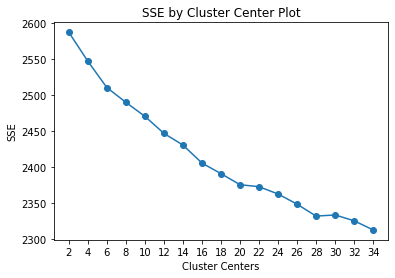

In [0]:
print(temp.shape)
from sklearn.cluster import MiniBatchKMeans

def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    f.savefig('./drive/My Drive/ALDA_Project/tweets_sse.png')
find_optimal_clusters(temp, 35)

In [0]:
labels_tweet = MiniBatchKMeans(n_clusters=28, init_size=1024, batch_size=2048, random_state=20).fit_predict(temp)


In [0]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(result, labels_tweet, vect.get_feature_names(), 10)


Cluster 0
thank,celebrate,happy,nlwd20,staff,today,day,national,workers,library

Cluster 1
question,people,today,best,tuesday,let,watching,morning,get,teawithgaryvee

Cluster 2
think,love,jersey,navy,chargers,white,pants,yellow,powder,blue

Cluster 3
see,day,would,shaken,badjamesbondpickuplines,texas,battle,jacinto,san,like

Cluster 4
one,goth,bday,cure,trending,thecure,happy,birthday,smith,robert

Cluster 5
enjoy,hope,great,day,8th,beautiful,happy,zfjzf2119,birthday,farrah

Cluster 6
funding,favorite,big,called,event,call,terrence,badjamesbondpickuplines,would,know

Cluster 7
due,munich,canceled,cancels,coronavirus,cancelled,germany,season,wedding,oktoberfest

Cluster 8
raspberry,beret,purple,cry,rain,doves,prince,corvette,little,red

Cluster 9
seeing,late,upping,student,back,wxwildcats,museum,tho,gallery,art

Cluster 10
move,would,block,nfl,made,available,trade,colts,hooker,malik

Cluster 11
earthday,celebrating,year,join,celebrate,anniversary,50th,day,tomorrow,earth

Cluster 12
abl

In [0]:
clusters=[[] for i in range(28)]
print(clusters)
for i in range(len(final_tweets)):
  clusters[labels_tweet[i]].append(final_tweets[i])

print(len(clusters[0]), clusters[0][:10])
print(len(clusters[1]), clusters[1][:10])
print(len(clusters[2]), clusters[2][:10])
print(len(clusters[3]), clusters[3][:10])
print(len(clusters[4]), clusters[4][:10])
print(len(clusters[5]), clusters[5][:10])
print(len(clusters[6]), clusters[6][:10])

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
65 ['thank library staff hard work dedication especially chaotic', 'happy national library workers day shouting valued staff share stories', 'today celebrate national library workers day skilled staff ida library dedicated virtually serv', 'today national library workers day day recognize phenomenal work dedication expertise lib', 'april national library workers day nlwd nlwd20', 'happy library workers day nlwd20 nlw2020 dresslikealibrarian linecamera', 'happy national library workers day acrl staff thankful library workers continue make', 'today recognize hard work commitment enthusiasm library workers across country celebrate', 'thanks library workers around maine country world working hard serve communities', 'today national library workers day cannot person celebrations still stayconnected']
57 ['best uniform sports really get better', 'paul showing colours nationalteada

In [0]:
pca=PCA(n_components=100)
reduced_tweets=pca.fit_transform(result)

pca = PCA(n_components=10).fit(temp)
data2D = pca.transform(temp)
print(np.shape(data2D))

In [0]:
# # data2D=cosine_similarity(data2D)
# km = KMeans(n_clusters=7).fit(data2D)
# plt.scatter(data2D[:, 0], data2D[:, 1],c=km.labels_)
# print(km.labels_)
# # print(np.shape(km.labels_))
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# # plt.show()
# plt.savefig('./drive/My Drive/ALDA_Project/kmeans_tweets.png')
# clusters=[[],[],[],[],[],[],[]]
# for i in range(len(final_tweets)):
#   clusters[km.labels_[i]].append(final_tweets[i])

# print(len(clusters[0]), clusters[0][:10])
# print(len(clusters[1]), clusters[1][:10])
# print(len(clusters[2]), clusters[2][:10])
# print(len(clusters[3]), clusters[3][:10])
# print(len(clusters[4]), clusters[4][:10])
# print(len(clusters[5]), clusters[5][:10])
# print(len(clusters[6]), clusters[6][:10])

In [0]:
#tokenize the text
topics_per_cluster_tweets={}

for c in range(len(clusters)):
  token=[]
  topics_per_cluster_tweets[c]=[]
  for text in clusters[c]:
      words=text.split(' ')
      words=list(set(words))
      arr=[]
      for word in words:
          #adding those words which are features
          if word in feature_names:
              arr.append(word)
      token.append(arr)     
  print(np.shape(token))
  #making a corpus of the tweets
  dictionary = corpora.Dictionary(token)
  # dictionary = corpora.Dictionary(clusters[c]) 
  print(np.shape(dictionary))
  corpus = [dictionary.doc2bow(text) for text in token]
  # pickle.dump(corpus, open('corpus.pkl', 'wb'))
  # dictionary.save('dictionary.gensim')

  #performing LDA
  NUM_TOPICS = 2
  ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
  ldamodel.save('model5.gensim')
  #find 8 relevant words in each category to define topic name
  topics = ldamodel.print_topics(num_words=20)
  for topic in topics:
      print(topic)
      names=topic[1].split("+")
      words=[i.split("*")[1] for i in names]
      for w in range(len(words)):
        words[w]=words[w].replace('"',"")
      words=[str(w) for w in words]
      print(" ".join(words))
      # print(topics_per_cluster[c])
      topics_per_cluster_tweets[c]=topics_per_cluster_tweets[c]+words

  print("\n")

print(topics_per_cluster_tweets)

(65,)
(227,)


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(0, '0.051*"library" + 0.034*"workers" + 0.029*"person" + 0.028*"still" + 0.025*"celebrations" + 0.025*"cannot" + 0.017*"time" + 0.017*"good" + 0.017*"critical" + 0.017*"role" + 0.014*"worker" + 0.014*"love" + 0.014*"highlight" + 0.010*"day" + 0.010*"work" + 0.010*"patrons" + 0.010*"students" + 0.009*"today" + 0.009*"national" + 0.009*"would"')
library  workers  person  still  celebrations  cannot  time  good  critical  role  worker  love  highlight  day  work  patrons  students  today  national  would
(1, '0.081*"library" + 0.076*"workers" + 0.072*"national" + 0.071*"day" + 0.038*"today" + 0.031*"happy" + 0.028*"staff" + 0.022*"nlwd20" + 0.020*"celebrate" + 0.017*"thank" + 0.015*"work" + 0.010*"favorite" + 0.010*"worker" + 0.008*"make" + 0.008*"amazing" + 0.007*"librarians" + 0.007*"recognize" + 0.007*"hard" + 0.007*"shout" + 0.007*"libraries"')
library  workers  national  day  today  happy  staff  nlwd20  celebrate  thank  work  favorite  worker  make  amazing  librarians  recognize 

In [0]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
from spacy.lang.en.stop_words import STOP_WORDS as en_stop
import re
from gensim import corpora
import pickle
import gensim

In [0]:
#reading news excel file from local machine
news=pd.read_excel('./drive/My Drive/ALDA_Project/rssNews.xlsx')
#reading only the article body
main_article=news['Body'].values.tolist()

In [0]:
final_articles=[]
for m in main_article:
    try:
        import math
        boolean=math.isnan(float(m))
    except:
        boolean=False
    if boolean==False:
        final_articles.append(m)
print(np.shape(final_articles))

(1370,)


In [0]:
articles=[]
#tweet cleansing
for s in final_articles:
    # print(s)
    s=s.strip()
    #remove urls from text
    s=re.sub(r'http\S+','', s)
    s=re.sub('[^A-Za-z0-9]+', ' ', s)
    filtered_words=s.split(' ')
    final=[]
    final=[fw.lower() for fw in filtered_words if not fw.isdigit()]
    articles.append(final)

print(np.shape(articles))


(1370,)


In [0]:
# import nltk
# nltk.download('stopwords')
final_news=[]
#remove stopwords from tweets
for art in articles:
    t1=[]
    t1 = [word for word in art if word not in stopwords.words('english')]
    t3=[]
    t3 = [word for word in art if word not in stopwords.words('french')]
    t2=[]
    t2= [word for word in t1 if len(word)>4]
    final_news.append(' '.join(t2))

print(np.shape(final_news))
final_news = [x for x in final_news if x]
print(np.shape(final_news))

(1370,)
(1370,)


In [0]:
import numpy as np

vect = TfidfVectorizer()
result = vect.fit_transform(final_news)
feature_names = vect.get_feature_names()
temp=result.toarray()
print(np.shape(temp))

(1370, 37902)


In [0]:
pca=PCA(n_components=100)
reduced_tweets=pca.fit_transform(result)

pca = PCA(n_components=5).fit(temp)
data2D = pca.transform(temp)
print(np.shape(data2D))

In [0]:
# km = KMeans(n_clusters=7).fit(data2D)
# plt.scatter(data2D[:, 0], data2D[:, 1],c=km.labels_)
# # print(km.labels_)
# # print(np.shape(km.labels_))
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# # plt.show()
# plt.savefig('./drive/My Drive/ALDA_Project/kmeans_news.png')
# clusters_news=[[],[],[],[], [],[],[]]
# for i in range(len(final_news)):
#   clusters_news[km.labels_[i]].append(final_news[i])

# print(clusters_news[0][0])
# print(len(clusters_news[0]), clusters_news[0][:10])
# print(len(clusters_news[1]), clusters_news[1][:10])
# print(len(clusters_news[2]), clusters_news[2][:10])
# print(len(clusters_news[3]), clusters_news[3][:10])
# print(len(clusters_news[4]), clusters_news[4][:10])
# print(len(clusters_news[5]), clusters_news[5][:10])
# print(len(clusters_news[6]), clusters_news[6][:10])

(1370, 37902)
Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters


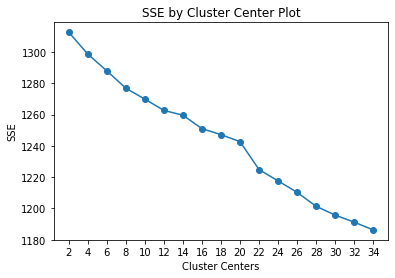

In [0]:
print(temp.shape)
from sklearn.cluster import MiniBatchKMeans

def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    f.savefig('./drive/My Drive/ALDA_Project/news_sse.png')
find_optimal_clusters(temp, 35)

In [0]:
labels_news = MiniBatchKMeans(n_clusters=28, init_size=1024, batch_size=2048, random_state=20).fit_predict(temp)


In [0]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(result, labels_news, vect.get_feature_names(), 10)


Cluster 0
draft,coach,basketball,jordan,clemson,football,championship,players,tournament,season

Cluster 1
wheeler,production,smithfield,remotely,company,workers,plants,spectrum,plant,employees

Cluster 2
leader,report,trump,pyongyang,korean,seoul,south,samsung,north,korea

Cluster 3
wines,people,salmon,recipe,polish,chicken,coffee,restaurant,restaurants,cooking

Cluster 4
teitelbaum,apple,recording,moreira,musical,theater,music,broadway,songs,album

Cluster 5
turkish,april,cities,statistics,adiyaman,government,deaths,erdogan,istanbul,turkey

Cluster 6
games,hockey,clubs,women,sports,teams,season,soccer,players,league

Cluster 7
parliament,court,supreme,unity,prime,minister,government,israel,gantz,netanyahu

Cluster 8
shopping,softer,posts,posting,rewardstyle,granquist,influencer,brands,karwowski,influencers

Cluster 9
company,theatrical,disney,whitaker,million,bongiovi,oyelowo,hollywood,obayashi,netflix

Cluster 10
modern,couple,balducci,marriage,dennehy,weddings,couples,married,wedd

In [0]:
clusters_news=[[] for i in range(28)]
print(clusters_news)
for i in range(len(final_news)):
  clusters_news[labels_news[i]].append(final_news[i])

print(len(clusters_news[0]), clusters_news[0][:10])
print(len(clusters_news[1]), clusters_news[1][:10])
print(len(clusters_news[2]), clusters_news[2][:10])
print(len(clusters_news[3]), clusters_news[3][:10])
print(len(clusters_news[4]), clusters_news[4][:10])
print(len(clusters_news[5]), clusters_news[5][:10])
print(len(clusters_news[6]), clusters_news[6][:10])

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
114 ['justin herbert eugene college street university oregon family still autzen stadium passing records ducks quarterback unless relocates start season herbert unclear burrow national title sought quarterback draft cincinnati bengals first herbert years stands pounds second ducks quarterback throw yards score touchdowns arguably second quarterback prospect teams looking successors incumbent throwers matter herbert plays likely bigger eugene spoken quarterback blossomed college football cocoon unusual seasons prospects former college teammates weight rooms trainers since coronavirus pandemic forced school closures herbert hometown shape prepare stage football career herbert completed front representatives march canceled spring basketball championship tournaments train athletic facility university closed lifted weights sheldon school mater school later began lifting weights g

In [0]:
from gensim import models

#tokenize the text
topics_per_cluster_news={}
seen=set()

for c in range(len(clusters_news)):
  token=[]
  topics_per_cluster_news[c]=[]
  for text in clusters_news[c]:
      words=text.split(' ')
      words=list(set(words))
      arr=[]
      for word in words:
          #adding those words which are features
          # if word not in seen:
          #   seen.add(word)
          arr.append(word)
      token.append(arr)     

  #making a corpus of the tweets
  dictionary1 = corpora.Dictionary(token) 
  # dictionary1.filter_extremes(no_below=2, no_above=0.1)
  corpus = [dictionary1.doc2bow(text) for text in token]
  # pickle.dump(corpus, open('corpus.pkl', 'wb'))
  # dictionary.save('dictionary.gensim')

  #performing LDA
  NUM_TOPICS = 1
  ldamodel1 = gensim.models.LdaMulticore(corpus, num_topics = NUM_TOPICS, id2word=dictionary1, passes=2, workers=2)
  # ldamodel.save('model5.gensim')
  #find 8 relevant words in each category to define topic name
  topics=ldamodel1.print_topics(num_words=50)
  for topic in topics:
      names=topic[1].split("+")
      words=[i.split("*")[1] for i in names]
      for w in range(len(words)):
        words[w]=words[w].replace('"',"")
      words=[str(w) for w in words]
      print(words, "\n", topics)
      # print(topics_per_cluster[c])
      topics_per_cluster_news[c]=topics_per_cluster_news[c]+words
      
  print("\n")
  # print(topics_per_cluster[c])
print(topics_per_cluster_news)

['would ', 'first ', 'season ', 'players ', 'three ', 'going ', 'could ', 'coach ', 'championship ', 'played ', 'years ', 'right ', 'teams ', 'still ', 'college ', 'playing ', 'national ', 'since ', 'games ', 'state ', 'former ', 'conference ', 'people ', 'every ', 'sports ', 'think ', 'player ', 'another ', 'including ', 'never ', 'seasons ', 'coronavirus ', 'without ', 'final ', 'though ', 'night ', 'league ', 'title ', 'around ', 'later ', 'school ', 'times ', 'tournament ', 'early ', 'career ', 'basketball ', 'always ', 'second ', 'might ', 'month'] 
 [(0, '0.002*"would" + 0.002*"first" + 0.002*"season" + 0.002*"players" + 0.002*"three" + 0.002*"going" + 0.002*"could" + 0.002*"coach" + 0.002*"championship" + 0.002*"played" + 0.002*"years" + 0.002*"right" + 0.002*"teams" + 0.002*"still" + 0.002*"college" + 0.002*"playing" + 0.001*"national" + 0.001*"since" + 0.001*"games" + 0.001*"state" + 0.001*"former" + 0.001*"conference" + 0.001*"people" + 0.001*"every" + 0.001*"sports" + 0.001*

In [0]:
tweets=topics_per_cluster_tweets[3]
for key,value in topics_per_cluster_news.items():
  print(value)
  results=0
  for i in tweets:
        if i in value:
          results+=1
  print(results,"\n")

['would ', 'first ', 'season ', 'players ', 'three ', 'going ', 'could ', 'coach ', 'championship ', 'played ', 'years ', 'right ', 'teams ', 'still ', 'college ', 'playing ', 'national ', 'since ', 'games ', 'state ', 'former ', 'conference ', 'people ', 'every ', 'sports ', 'think ', 'player ', 'another ', 'including ', 'never ', 'seasons ', 'coronavirus ', 'without ', 'final ', 'though ', 'night ', 'league ', 'title ', 'around ', 'later ', 'school ', 'times ', 'tournament ', 'early ', 'career ', 'basketball ', 'always ', 'second ', 'might ', 'month']
3 

['executive ', 'workers ', 'could ', 'people ', 'would ', 'company ', 'coronavirus ', 'million ', 'number ', 'president ', 'states ', 'businesses ', 'united ', 'recent ', 'officials ', 'employees ', 'least ', 'years ', 'still ', 'percent ', 'hours ', 'cases ', 'pandemic ', 'positive ', 'country ', 'virus ', 'weeks ', 'going ', 'large ', 'already ', 'according ', 'plant ', 'costs ', 'across ', 'reduce ', 'another ', 'became ', 'annou

In [0]:
tweet_count = 0
news_count = 0
sim_matrix = np.zeros((len(topics_per_cluster_tweets), len(topics_per_cluster_news)), dtype=int) #[[0]*len(topics_per_cluster_news)]*len(topics_per_cluster_tweets)
print(sim_matrix)
tweet_topics = [""] * 28
news_topics = [""] * 28

# print(len(sim_matrix), len(sim_matrix[0]))
for k, v in topics_per_cluster_tweets.items():
  news_count = 0
  tweet_topics[tweet_count] += " ".join(v[:10])
  for key, value in topics_per_cluster_news.items():
    if tweet_count == 1:
      news_topics[news_count] += " ".join(value[:10])
    for item in v:
      if item in value:
        sim_matrix[tweet_count][news_count] += 1
        if item not in tweet_topics[tweet_count]:
          tweet_topics[tweet_count] += item
        if item not in news_topics[news_count]:
          news_topics[news_count] += item
        # print(tweet_count, news_count, item, sim_matrix[tweet_count][news_count])
        # print(sim_matrix)
    news_count += 1
    # print("\n")
  tweet_count += 1

    # print(v, "\n",value)

print('\n'.join([''.join(['{:4}'.format(item) for item in row]) for row in sim_matrix]))
# print(tweet_topics, "\n", news_topics)
for i in range(len(tweet_topics)):
  print(i,"Tweet:",tweet_topics[i],"\nNews:" ,news_topics[i],"\n\n")

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

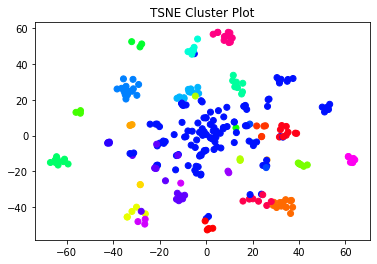

In [0]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm


def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=2000, replace=False) #1370
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    # print(max_items)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1)#, 2, figsize=(14, 6))
    
    # ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    # ax[0].set_title('PCA Cluster Plot')
    
    # ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    # ax[1].set_title('TSNE Cluster Plot')
    ax.scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax.set_title('TSNE Cluster Plot')
    f.savefig('./drive/My Drive/ALDA_Project/clusters.png')
    
plot_tsne_pca(result, labels_tweet)
    

In [0]:
print(type(clusters_news), result.shape[0], np.array(clusters_news).shape)

<class 'list'> 2650 (28,)


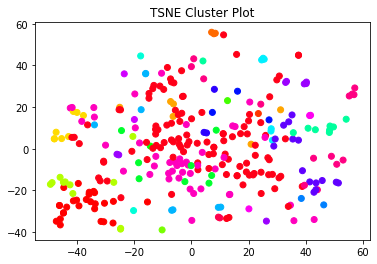

In [0]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm


def plot_tsne_pca_new(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=1200, replace=False) #1370
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    # print(max_items)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    # f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    # ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    # ax[0].set_title('PCA Cluster Plot')
    
    # ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    # ax[1].set_title('TSNE Cluster Plot')

    f, ax = plt.subplots(1)
    ax.scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax.set_title('TSNE Cluster Plot')
    f.savefig('./drive/My Drive/ALDA_Project/clusters_news.png')

plot_tsne_pca_new(result, labels_news)
    